Statistical Summary:


,Age,Annual Income ($),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


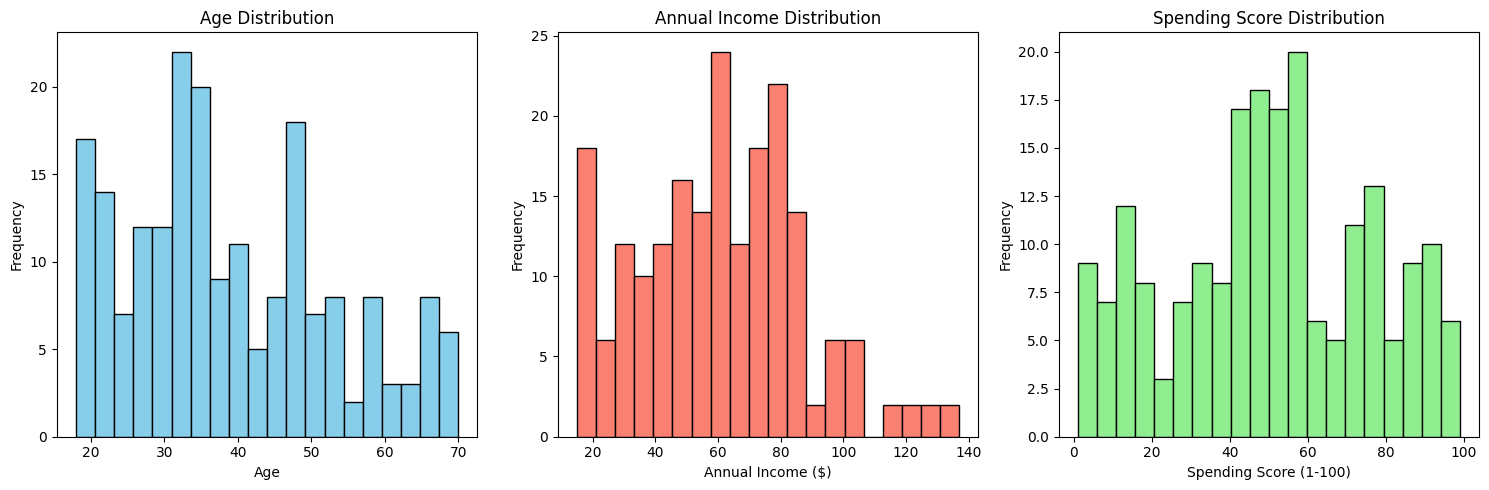

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File path for the data set's .csv. It is in same directory.
file_path = "Marketing_Customers.csv"

# Importing data into a DataFrame and selecting specific columns
columns_to_use = ['Age', 'Annual Income ($)', 'Spending Score (1-100)']
df = pd.read_csv(file_path, usecols=columns_to_use)

# Removing records where Age is less than 18
df = df[df['Age'] >= 18]

# Dropping duplicate records
df = df.drop_duplicates()

# Displaying the statistical summary of the DataFrame
print("Statistical Summary:")
display(df.describe())

# Plotting histograms for each numerical column
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Annual Income ($)'], bins=20, color='salmon', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['Spending Score (1-100)'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
import ipywidgets as widgets

# Create dropdown widgets for selecting X and Y axes
x_axis_widget = widgets.Dropdown(
    options=df.columns,
    description='X Axis:',
    disabled=False,
)

y_axis_widget = widgets.Dropdown(
    options=df.columns,
    description='Y Axis:',
    disabled=False,
)

# Display the dropdown widgets
display(x_axis_widget, y_axis_widget)

Dropdown(description='X Axis:', options=('Age', 'Annual Income ($)', 'Spending Score (1-100)'), value='Age')

Dropdown(description='Y Axis:', options=('Age', 'Annual Income ($)', 'Spending Score (1-100)'), value='Age')

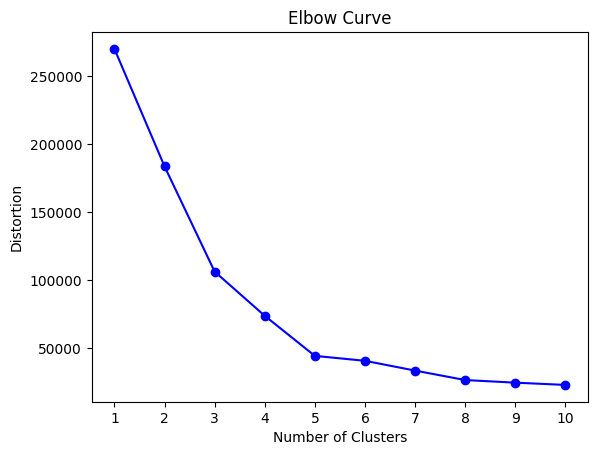

Dropdown(description='Number of Clusters:', index=2, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=3)

In [23]:
from IPython.display import display
from sklearn.cluster import KMeans

# Function to compute the elbow curve based on selected axes
def compute_elbow_curve(x_column, y_column):
    # Create a new DataFrame with selected columns (x and y)
    data = df[[x_column, y_column]]
    
    # Initialize an empty list to store distortions
    distortions = []

    # Perform K-means clustering for cluster sizes from 1 to 10
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)  # inertia_ gives the sum of squared distances to the closest centroid

    # Plot the elbow curve
    plt.plot(range(1, 11), distortions, marker='o', linestyle='-', color='b')
    plt.title('Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.xticks(range(1, 11))
    plt.show()

# Call the function to compute the elbow curve based on initial selection
compute_elbow_curve(x_axis_widget.value, y_axis_widget.value)
    
# Create a dropdown widget for selecting the number of clusters
cluster_widget = widgets.Dropdown(
    options=[i for i in range(1, 11)],
    value=3,  # Default value
    description='Number of Clusters:',
    disabled=False,
)

# Display the dropdown widget
display(cluster_widget)

For n_clusters = 5, the average silhouette_score is : 0.553931997444648


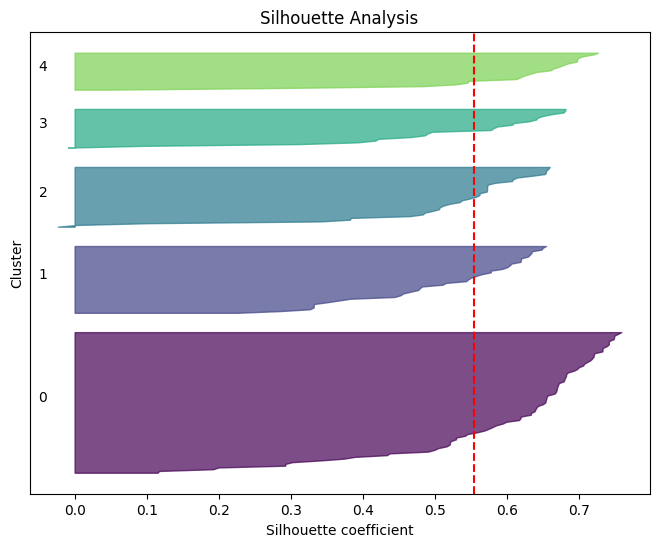

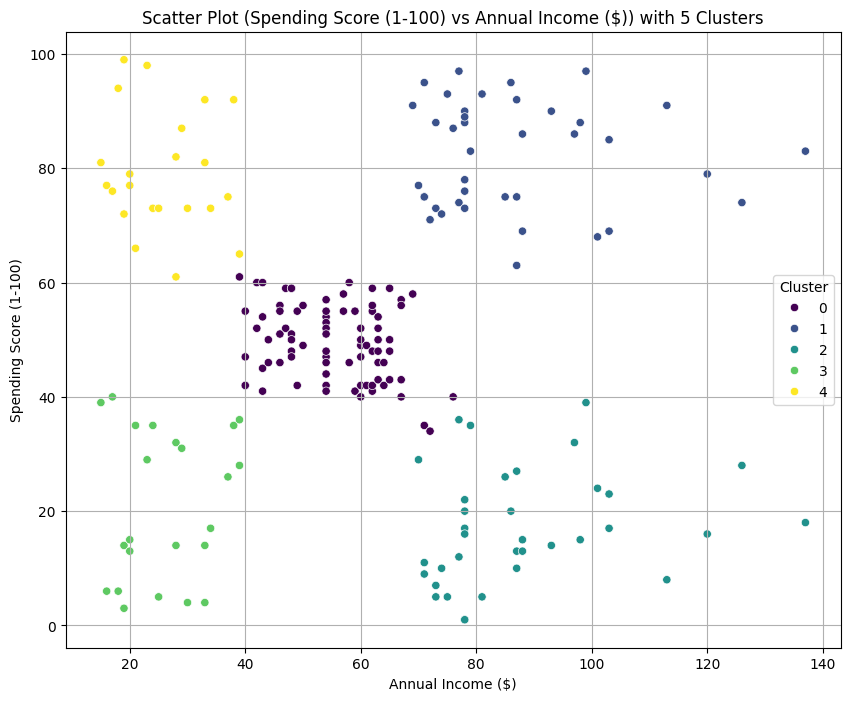

In [24]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import seaborn as sns

# Function to compute and display silhouette analysis and scatter plot for selected axes and number of clusters
def analyze_clusters(x_column, y_column, num_clusters):
    # Create a new DataFrame with selected columns (x and y)
    data = df[[x_column, y_column]]
    
    # Convert selected columns to numpy arrays
    X = data.values
    
    # Create KMeans with the selected number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    
    # Fit KMeans to the data
    kmeans.fit(X)
    
    # Compute the silhouette scores for each sample
    silhouette_vals = silhouette_samples(X, kmeans.labels_)

    # Compute the overall silhouette score
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print(f"For n_clusters = {num_clusters}, the average silhouette_score is : {silhouette_avg}")
    
    # Display silhouette analysis
    plt.figure(figsize=(8, 6))
    y_lower = 10
    for i in range(num_clusters):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
        cluster_silhouette_vals.sort()
        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.viridis(float(i) / num_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.title('Silhouette Analysis')
    plt.xlabel('Silhouette coefficient')
    plt.ylabel('Cluster')
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.show()

    # Add cluster labels to the DataFrame
    data['Cluster'] = kmeans.labels_

    # Plot the scatter plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=x_column, y=y_column, hue='Cluster', data=data, palette='viridis', legend='full')
    plt.title(f'Scatter Plot ({y_column} vs {x_column}) with {num_clusters} Clusters')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()

# Call the function to compute and display silhouette analysis and scatter plot based on initial selection
analyze_clusters(x_axis_widget.value, y_axis_widget.value, cluster_widget.value)


<function matplotlib.pyplot.show(close=None, block=None)>

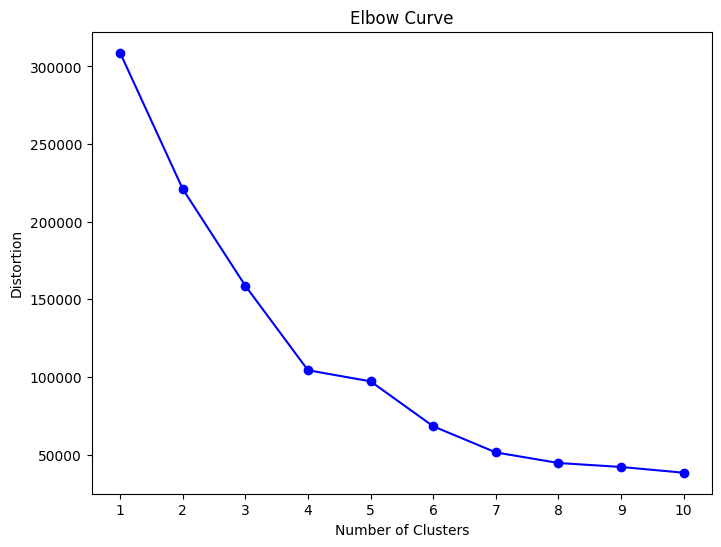

In [6]:
# Selecting all three data points
data = df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]

# Initialize an empty list to store distortions
distortions = []

# Perform K-means clustering for cluster sizes from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)  # inertia_ gives the sum of squared distances to the closest centroid

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.xticks(range(1, 11))
plt.show

In [7]:
# Create a dropdown widget for selecting the number of clusters
num_clusters_widget = widgets.Dropdown(
    options=[i for i in range(2, 11)],  # Allow selecting 2 to 10 clusters
    description='Number of Clusters:',
    disabled=False,
)

# Display the dropdown widget
display(num_clusters_widget)

Dropdown(description='Number of Clusters:', options=(2, 3, 4, 5, 6, 7, 8, 9, 10), value=2)

For n_clusters = 4, the average silhouette_score is : 0.39236034113086576


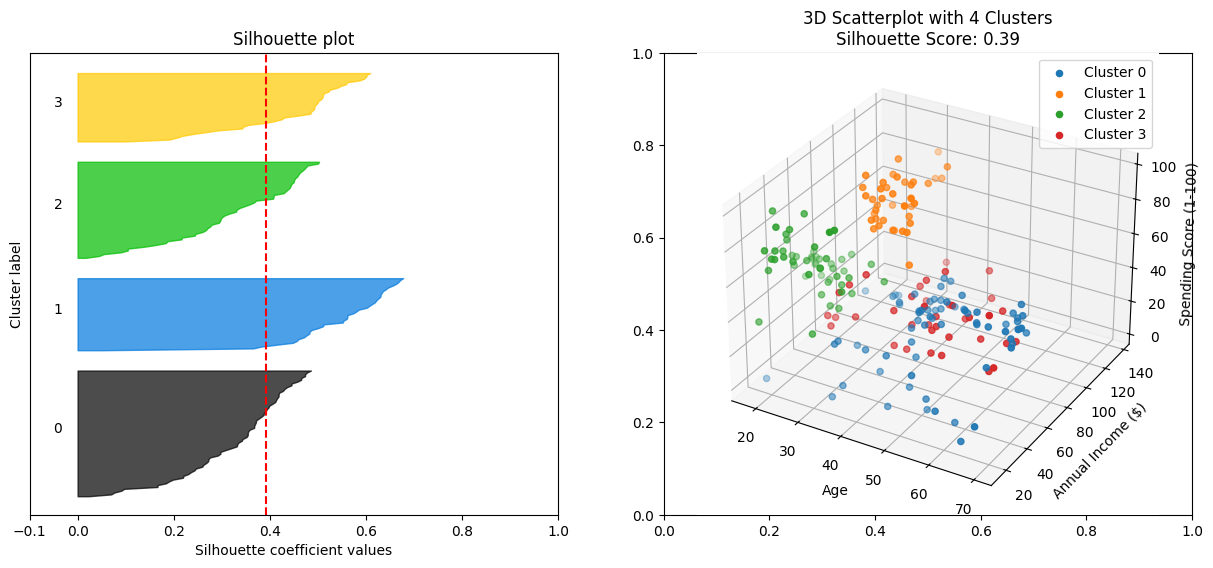

In [12]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Create a function to visualize clusters in a 3D scatterplot and display silhouette analysis
def plot_clusters_3d_with_silhouette(data, num_clusters):
    # Create KMeans with the selected number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    
    # Fit KMeans to the data
    kmeans.fit(data)
    
    # Assign cluster labels to each data point
    labels = kmeans.labels_
    
    # Compute silhouette scores
    silhouette_avg = silhouette_score(data, labels)
    print(f"For n_clusters = {num_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, labels)
    
    # Plot the silhouette analysis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # First subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (num_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(num_clusters):
        # Aggregate silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
    
    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # Vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # Second subplot is the 3D scatterplot
    ax2 = fig.add_subplot(122, projection='3d')

    for i in range(num_clusters):
        # Plot data points for each cluster
        ax2.scatter(data.iloc[labels == i, 0], data.iloc[labels == i, 1], data.iloc[labels == i, 2], label=f'Cluster {i}')

    ax2.set_xlabel(data.columns[0])
    ax2.set_ylabel(data.columns[1])
    ax2.set_zlabel(data.columns[2])
    ax2.set_title(f'3D Scatterplot with {num_clusters} Clusters\nSilhouette Score: {silhouette_avg:.2f}')
    ax2.legend()
    
    plt.show()

# Plot clusters for the initial value selected in the dropdown
plot_clusters_3d_with_silhouette(df, num_clusters_widget.value)